# Import all libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SOM import SOM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

### Generate the dataset (300x1) x 3 Classes

In [2]:
fst_class = 500
snd_class = 500
thd_class = 500

X_1 = np.c_[(np.full(fst_class, 1) + np.random.randn(fst_class),
            np.full(fst_class, 1) + np.random.randn(fst_class))]

X_2 = np.c_[(np.full(snd_class, 1) + np.random.randn(snd_class),
            np.full(snd_class, 4) + np.random.randn(snd_class))]

X_3 = np.c_[(np.full(thd_class, 4) + np.random.randn(thd_class),
            np.full(thd_class, 4) + np.random.randn(thd_class))]

Y_1 = np.full(fst_class, 0)
Y_2 = np.full(snd_class, 1)
Y_3 = np.full(thd_class, 2)

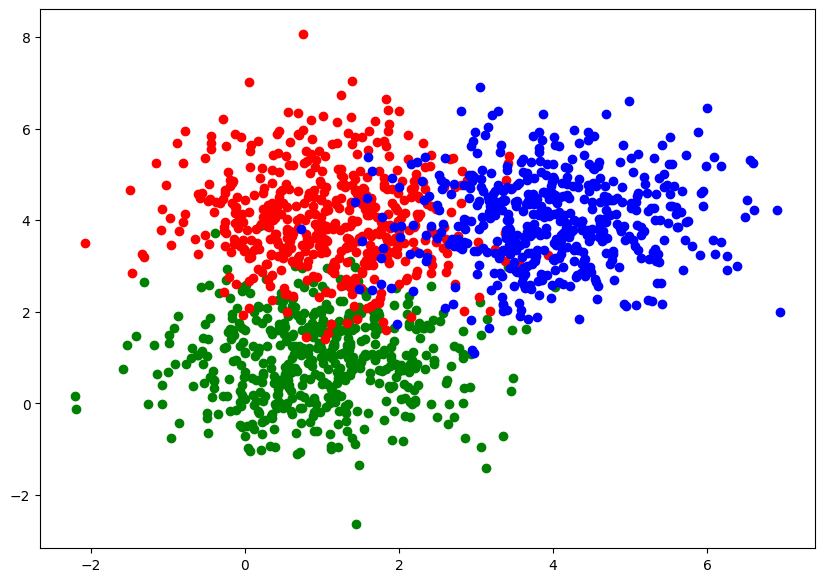

In [3]:
plt.figure(figsize=(10, 7))
plt.scatter(X_1[:, 0], X_1[:, 1], marker='o', c='g')
plt.scatter(X_2[:, 0], X_2[:, 1], marker='o', c='r')
plt.scatter(X_3[:, 0], X_3[:, 1], marker='o', c='b')
plt.style.use('dark_background')
plt.show()

### Preprocess and shuffle data:

In [4]:
a = np.vstack((X_1, X_2, X_3))
b = np.hstack((Y_1, Y_2, Y_3))
all = np.hstack((a, b.reshape(a.shape[0], 1)))
np.random.shuffle(all)

X = all[:, :2]
Y = all[:, 2]

### Split in train and test:

In [5]:
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test_ = train_test_split(X, Y, train_size=0.7)

X_train = preprocessing.minmax_scale(X_train.reshape(X_train.shape[0], 2), axis=0)
Y_train = preprocessing.minmax_scale(Y_train.reshape(Y_train.shape[0], 1), axis=0)
X_test = preprocessing.minmax_scale(X_test.reshape(X_test.shape[0], 2), axis=0)
Y_test = preprocessing.minmax_scale(Y_test_.reshape(Y_test_.shape[0], 1), axis=0)


# Create, configure and train the model

In [6]:
som = SOM(features_num=2, map_size=(10, 10))
som.train(X_train,
          lr=0.1,
          iter=20000,
          radius=3,
          weight_history=True,
          map_history=True,
          Y=Y_train)
som.create_map(X_train, Y_train)

KeyboardInterrupt: 

# ANIMATION

In [ ]:
import imageio.v2 as imageio
import os

def create_gif(images, gif_name):
    frames = []
    for image_name in images:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name, frames, 'GIF', duration=0.1)

    # delete all files in images folder
    for file_name in os.listdir("images"):
        os.remove(f"images/{file_name}")
    return

def create_gif_from_history(weights_history, map_history, gif_name):
    images = []

    for index, weights in enumerate(weights_history):
        map = map_history[index]

        plt.figure(figsize=(13, 12))
        plt.subplot(1, 3, 1, title='Weights 1')
        plt.imshow(weights[0], cmap='plasma')
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.tight_layout(pad=4.0)

        plt.subplot(1, 3, 2, title='Weights 2')
        plt.imshow(weights[1], cmap='plasma')
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.tight_layout(pad=4.0)

        plt.subplot(1, 3, 3, title=f'Map iter={index * 300}')
        plt.imshow(map, cmap='plasma', vmin=-1, vmax=1)
        plt.colorbar(fraction=0.046, pad=0.04)
        plt.tight_layout(pad=4.0)

        plt.savefig(f"images/SOM_{index}.png")
        plt.close()
        images.append(f"images/SOM_{index}.png")

    return create_gif(images, gif_name)

In [ ]:

create_gif_from_history(som.weights_history, som.map_history, "animations/SOM_History(1).gif")


### Show the maps:

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1, title='Weights 1')
plt.imshow(som.weights[0], cmap='plasma')
plt.subplot(1, 3, 2, title='Weights 2')
plt.imshow(som.weights[1], cmap='plasma')
plt.subplot(1, 3, 3, title='Map')
plt.imshow(som.map, cmap='plasma')
plt.show()

### Check metrics:

In [ ]:
predictions = []
for i, X in enumerate(X_test):
    predictions.append(som.predict(X))

print(f"MSE: {mse(predictions, Y_test)}\n"                      # Where 0.0 is perfect
      f"Accuracy: {accuracy_score(Y_test, predictions)}")       # Where 1.0 is perfect

# Visualization

In [ ]:
plt.figure(figsize=(30, 30))


input_plt = plt.subplot2grid((3, 3), (0, 0))
out_plt = plt.subplot2grid((3, 3), (0, 1))

input_plt.scatter(X_1[:, 0], X_1[:, 1], marker='o', c='g')
input_plt.scatter(X_2[:, 0], X_2[:, 1], marker='o', c='r')
input_plt.scatter(X_3[:, 0], X_3[:, 1], marker='o', c='b')

i = 0
for point in X_test:
    if predictions[i] == 0.5:
        out_plt.scatter(point[0], point[1], marker='x', c='red')
    elif predictions[i] == 0:
        out_plt.scatter(point[0], point[1], marker='x', c='green')
    elif predictions[i] == 1:
        out_plt.scatter(point[0], point[1], marker='x', c='blue')

    i += 1

plt.show()